<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/solucion_Parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
pip install emcee

In [103]:
pip install corner

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.optimize import minimize
import emcee
import corner


#Problema 2 (Cadena de producción)

P = np.array([
    [0.10, 0.00, 0.00],
    [0.90, 0.05, 0.00],
    [0.00, 0.95, 1.00]
])


P_T = P.T
n = P_T.shape[0]
A = P_T - np.eye(n)
A[-1] = np.ones(n)
b = np.zeros(n)
b[-1] = 1

pi = np.linalg.solve(A, b)

print("Estado estable \u03c0:", pi)

# Punto (e)
P_e = pi[0] * pi[1]
print("(e) Probabilidad de que ambas estaciones estén ocupadas:", P_e)

# Punto (f)
P_f = 1 - pi[2]
print("(f) Probabilidad de que al menos una estación esté ocupada:", P_f)

# Punto (g)
P_g = 1 - pi[0]
print("(g) Probabilidad de que la estación de producción esté vacía:", P_g)


Estado estable π: [0.33333333 0.33333333 0.33333333]
(e) Probabilidad de que ambas estaciones estén ocupadas: 0.1111111111111111
(f) Probabilidad de que al menos una estación esté ocupada: 0.6666666666666666
(g) Probabilidad de que la estación de producción esté vacía: 0.6666666666666667


In [105]:
#Problema 3 (Cadena de producción con devolución de producto)

P_modified = np.array([
    [0.12, 0.02, 0.00],
    [0.88, 0.03, 0.00],
    [0.00, 0.95, 1.00]
])

P_T_modified = P_modified.T
n = P_T_modified.shape[0]
A_modified = P_T_modified - np.eye(n)
A_modified[-1] = np.ones(n)
b_modified = np.zeros(n)
b_modified[-1] = 1

pi_modified = np.linalg.solve(A_modified, b_modified)

print("Estado estable modificado \u03c0:", pi_modified)

# (e)
P_e_modified = pi_modified[0] * pi_modified[1]
print("(e) Probabilidad de que ambas estaciones estén ocupadas:", P_e_modified)

# (f)
P_f_modified = 1 - pi_modified[2]
print("(f) Probabilidad de que al menos una estación esté ocupada:", P_f_modified)

# (g)
P_g_modified = 1 - pi_modified[0]
print("(g) Probabilidad de que la estación de producción esté vacía:", P_g_modified)


Estado estable modificado π: [0.33333333 0.33333333 0.33333333]
(e) Probabilidad de que ambas estaciones estén ocupadas: 0.1111111111111111
(f) Probabilidad de que al menos una estación esté ocupada: 0.6666666666666666
(g) Probabilidad de que la estación de producción esté vacía: 0.6666666666666667


Secuencia oculta más probable: ['B', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
Probabilidad de la secuencia más probable: 0.00029491200000000015
                    Secuencia  Probabilidad  Probabilidad acumulada
128  [B, J, J, J, J, J, J, J]  2.949120e-04                0.000295
0    [J, J, J, J, J, J, J, J]  1.638400e-04                0.000459
192  [B, B, J, J, J, J, J, J]  5.898240e-05                0.000518
136  [B, J, J, J, B, J, J, J]  3.317760e-05                0.000551
130  [B, J, J, J, J, J, B, J]  3.317760e-05                0.000584
..                        ...           ...                     ...
84   [J, B, J, B, J, B, J, J]  3.200000e-10                0.000881
53   [J, J, B, B, J, B, J, B]  2.560000e-10                0.000881
101  [J, B, B, J, J, B, J, B]  2.560000e-10                0.000881
117  [J, B, B, B, J, B, J, B]  5.120000e-11                0.000881
85   [J, B, J, B, J, B, J, B]  1.600000e-11                0.000881

[256 rows x 3 columns]


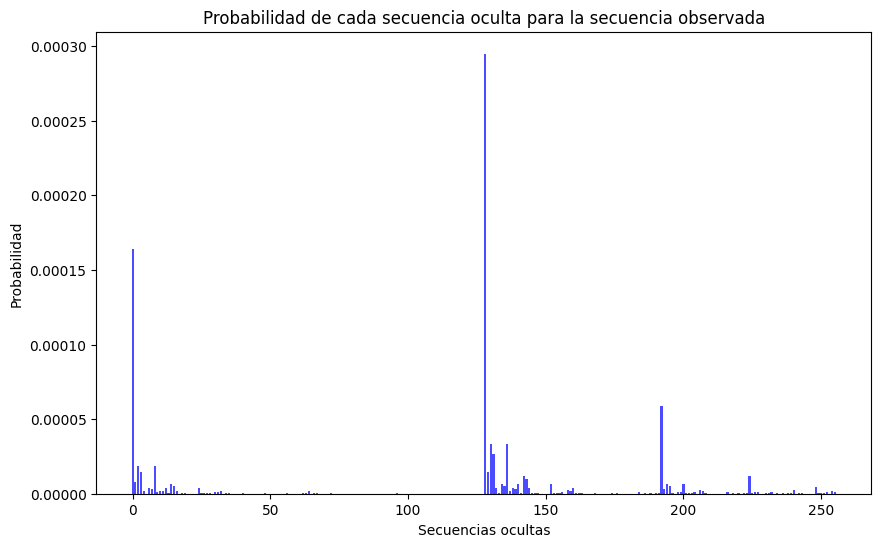

Probabilidad por estado observable: [6.08545704e-04 1.29401617e-04 4.60094598e-05 5.14860966e-05
 1.65985550e-04 9.68557734e-05 2.00007106e-04 1.21343690e-04]
Probabilidad de que ambas estaciones estén ocupadas al mismo tiempo: 1.2230590464000012e-06
Probabilidad de que al menos una estación esté ocupada: 0.000717651608806401
Probabilidad de que la estación de producción esté vacía: 0.0002729459047680002
Probabilidades de configuraciones estacionarias:
Configuración (0, 0, 0, 1, 1, 1, 1, 1): 1.0616832000000006e-06
Configuración (0, 0, 1, 0, 1, 1, 1, 0): 8.294400000000004e-08
Configuración (1, 0, 0, 1, 0, 1, 1, 1): 6.635520000000004e-08
Configuración (0, 0, 0, 1, 0, 0, 0, 1): 1.0240000000000006e-07
Configuración (1, 1, 0, 0, 0, 0, 0, 1): 2.9491200000000017e-06
Configuración (1, 1, 0, 0, 1, 1, 1, 1): 1.9110297600000017e-06
Configuración (1, 1, 0, 0, 0, 0, 1, 0): 6.635520000000004e-06
Configuración (1, 1, 1, 0, 1, 1, 1, 0): 4.777574400000003e-07
Configuración (1, 1, 1, 1, 0, 1, 1, 0): 5.3

In [106]:
#Problema 1: Casino tramposo

def viterbi_algorithm(observed_sequence, states, start_prob, trans_prob, emit_prob):
    """
    Implementa el algoritmo de Viterbi para encontrar la secuencia oculta más probable.
    """
    T = len(observed_sequence)
    N = len(states)

    viterbi = np.zeros((N, T))
    backpointer = np.zeros((N, T), dtype=int)

    for s in range(N):
        viterbi[s, 0] = start_prob[s] * emit_prob[s, observed_sequence[0]]

    for t in range(1, T):
        for s in range(N):
            probabilities = [viterbi[prev_state, t-1] * trans_prob[prev_state, s] * emit_prob[s, observed_sequence[t]] for prev_state in range(N)]
            viterbi[s, t] = max(probabilities)
            backpointer[s, t] = np.argmax(probabilities)

    best_path_prob = max(viterbi[:, T-1])
    best_last_state = np.argmax(viterbi[:, T-1])
    best_path = [best_last_state]
    for t in range(T-1, 0, -1):
        best_path.insert(0, backpointer[best_path[0], t])

    return best_path, best_path_prob

states = ["J", "B"]
observations = ["S", "C"]
start_prob = np.array([0.2, 0.8])

obs_sequence = [0, 1, 1, 1, 0, 1, 0, 1]

trans_prob = np.array([[0.8, 0.2],
                        [0.2, 0.8]])

emit_prob = np.array([[0.5, 0.5],
                       [0.9, 0.1]])

hidden_sequence, max_prob = viterbi_algorithm(obs_sequence, states, start_prob, trans_prob, emit_prob)
print("Secuencia oculta más probable:", [states[s] for s in hidden_sequence])
print("Probabilidad de la secuencia más probable:", max_prob)

from itertools import product

all_hidden_sequences = list(product(range(len(states)), repeat=len(obs_sequence)))
probabilities = []
for sequence in all_hidden_sequences:
    prob = start_prob[sequence[0]]
    for t in range(1, len(sequence)):
        prob *= trans_prob[sequence[t-1], sequence[t]]
    for t in range(len(sequence)):
        prob *= emit_prob[sequence[t], obs_sequence[t]]
    probabilities.append(prob)

sequence_labels = [[states[s] for s in seq] for seq in all_hidden_sequences]
data = pd.DataFrame({"Secuencia": sequence_labels, "Probabilidad": probabilities})
data["Probabilidad acumulada"] = data["Probabilidad"].cumsum() / sum(probabilities)
data = data.sort_values("Probabilidad", ascending=False)
data["Probabilidad acumulada"] = data["Probabilidad"].cumsum()

filtered_data = data[data["Probabilidad acumulada"] <= 0.2]
print(filtered_data)

# (c)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(probabilities)), probabilities, color='blue', alpha=0.7)
plt.title("Probabilidad de cada secuencia oculta para la secuencia observada")
plt.xlabel("Secuencias ocultas")
plt.ylabel("Probabilidad")
plt.show()

# (d)
observable_probabilities = np.zeros(len(obs_sequence))
for t in range(len(obs_sequence)):
    observable_probabilities[t] = sum(probabilities[i] for i, seq in enumerate(all_hidden_sequences) if seq[t] == 1)

print("Probabilidad por estado observable:", observable_probabilities)

# (e)
joint_prob = sum([probabilities[i] for i, seq in enumerate(all_hidden_sequences) if all(s == 1 for s in seq)])
print("Probabilidad de que ambas estaciones estén ocupadas al mismo tiempo:", joint_prob)

# (f)
at_least_one_occupied_prob = sum([probabilities[i] for i, seq in enumerate(all_hidden_sequences) if any(s == 1 for s in seq)])
print("Probabilidad de que al menos una estación esté ocupada:", at_least_one_occupied_prob)

# (g)
production_empty_prob = sum([probabilities[i] for i, seq in enumerate(all_hidden_sequences) if seq[0] == 0])
print("Probabilidad de que la estación de producción esté vacía:", production_empty_prob)

# (h)
stationary_config_probs = {}
for seq in set(all_hidden_sequences):
    stationary_config_probs[tuple(seq)] = sum([probabilities[i] for i, s in enumerate(all_hidden_sequences) if tuple(s) == tuple(seq)])

print("Probabilidades de configuraciones estacionarias:")
for config, prob in stationary_config_probs.items():
    print(f"Configuración {config}: {prob}")


    Velocidad
0  547.265773
1  449.920418
2  773.814382
3  823.668389
4  352.873887


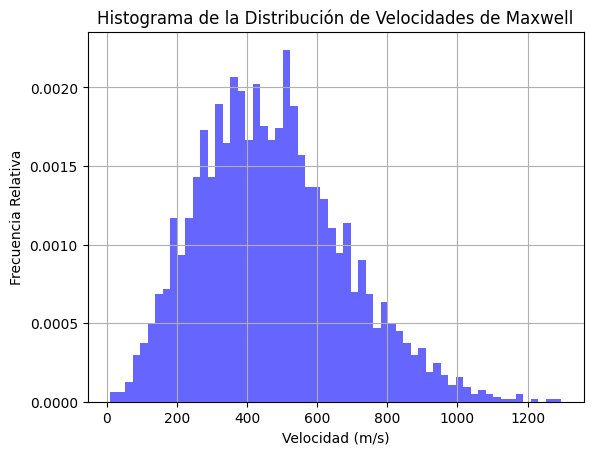

Valor promedio empírico de la velocidad: 472.18 m/s


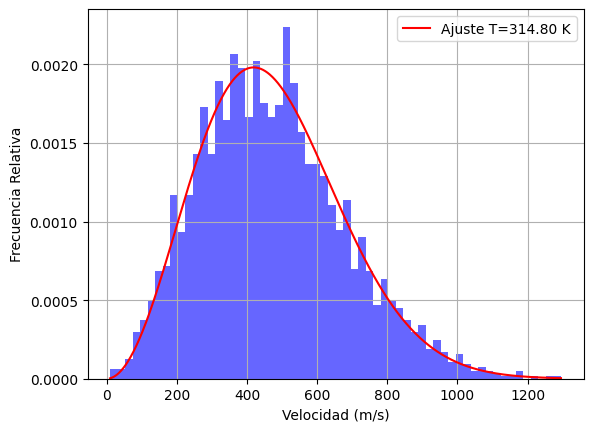

Velocidad más probable Vp: 420.60 m/s
Velocidad promedio Vm: 474.60 m/s
Velocidad cuadrática media Vrms: 515.13 m/s


<ipython-input-107-4f738836494f>:69: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = likelihood(proposal) / likelihood(current) * prior(proposal) / prior(current)
<ipython-input-107-4f738836494f>:30: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(- (m * (v ** 2)) / (2 * kB * T))
<ipython-input-107-4f738836494f>:32: RuntimeWarning: invalid value encountered in scalar power
  return (((m) / (2 * np.pi * kB * T)) ** (3/2)) * (4 * np.pi * (v ** 2)) * exp_term


Intervalo de confianza para la temperatura: (nan, nan) K
No se puede rechazar la hipótesis de temperaturas mayores a 305.6 K.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [107]:
#Problema 9 (Estimación de la temperatura de un gas diatómico)

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url)

print(data.head())


velocidades = data['Velocidad']

n_bins = 60
v_min = velocidades.min()
v_max = velocidades.max()

plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='b')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de la Distribución de Velocidades de Maxwell')
plt.grid(True)
plt.show()
v_promedio = np.mean(velocidades)
print(f"Valor promedio empírico de la velocidad: {v_promedio:.2f} m/s")

m = 0.028 / 1000
kB = 8.31e-3
T = 297.89

def f(v, m, kB, T):

    exp_term = np.exp(- (m * (v ** 2)) / (2 * kB * T))
    exp_term = np.where(exp_term > 1e-300, exp_term, 1e-300)
    return (((m) / (2 * np.pi * kB * T)) ** (3/2)) * (4 * np.pi * (v ** 2)) * exp_term

def maxwell_dist(v, m, kB, T):
    return (((m) / (2 * np.pi * kB * T)) ** (3/2)) * (4 * np.pi * (v ** 2)) * np.exp(- (m * (v ** 2)) / (2 * kB * T))

hist, bins = np.histogram(velocidades, bins=n_bins, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

params, _ = curve_fit(maxwell_dist, bin_centers, hist, p0=[m, kB, T])

plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='b')
v_fit = np.linspace(v_min, v_max, 1000)
plt.plot(v_fit, maxwell_dist(v_fit, *params), 'r-', label=f'Ajuste T={params[2]:.2f} K')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia Relativa')
plt.legend()
plt.grid(True)
plt.show()

R = 8.314
M = 0.028

V_p = np.sqrt(2 * R * T / M)
print(f"Velocidad más probable Vp: {V_p:.2f} m/s")

V_m = (2 / np.sqrt(np.pi)) * V_p
print(f"Velocidad promedio Vm: {V_m:.2f} m/s")

V_rms = np.sqrt(3 * R * T / M)
print(f"Velocidad cuadrática media Vrms: {V_rms:.2f} m/s")

def metropolis_hastings(n_samples, prior, likelihood, initial_guess):
    samples = np.zeros((n_samples, len(initial_guess)))
    samples[0, :] = initial_guess
    for i in range(1, n_samples):
        current = samples[i-1, :]
        proposal = current + np.random.normal(0, 0.1, size=len(current))
        acceptance_ratio = likelihood(proposal) / likelihood(current) * prior(proposal) / prior(current)
        if acceptance_ratio > np.random.rand():
            samples[i, :] = proposal
        else:
            samples[i, :] = current
    return samples

prior = lambda x: 1
likelihood = lambda x: np.prod([f(v, *x) for v in velocidades])
samples = metropolis_hastings(1000, prior, likelihood, [m, kB, T])

T_crit = 305.6

mean_T = np.mean(samples[:, 2])
std_T = np.std(samples[:, 2])

ci_lower, ci_upper = norm.interval(0.95, loc=mean_T, scale=std_T)

print(f"Intervalo de confianza para la temperatura: ({ci_lower:.2f}, {ci_upper:.2f}) K")

if ci_upper < T_crit:
    print(f"Temperaturas mayores a {T_crit} K están excluidas.")
else:
    print(f"No se puede rechazar la hipótesis de temperaturas mayores a {T_crit} K.")


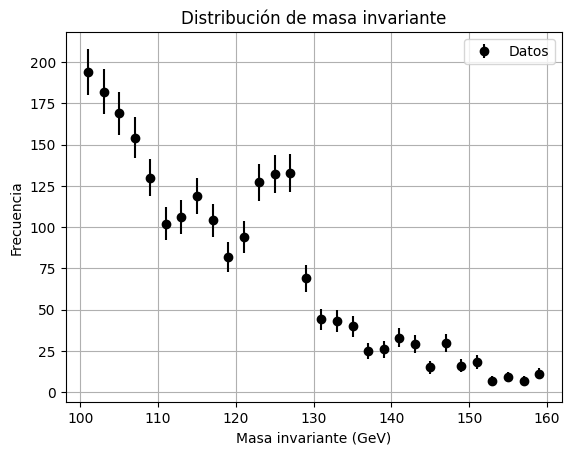

Valor estimado para el parámetro α del modelo nulo: 17.61888053628762


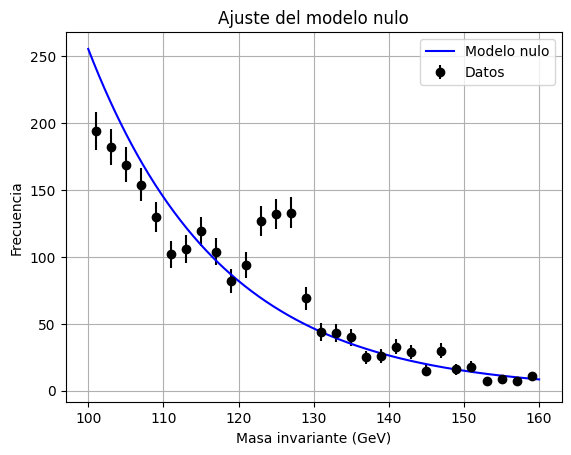

Parámetros del modelo alternativo: A=0.14208932232390514, μ=125.19845517047781, σ=2.7749947051475505, α=16.36446636167997


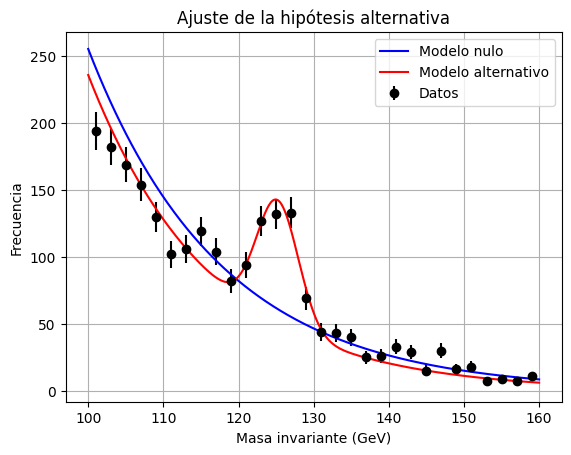

Desviación estándar de la diferencia (nσ): 15.2070782884126
Tiempo de vida estimado de la partícula: 2.2829299059298736e-14 segundos


100%|██████████| 2000/2000 [02:55<00:00, 11.41it/s]


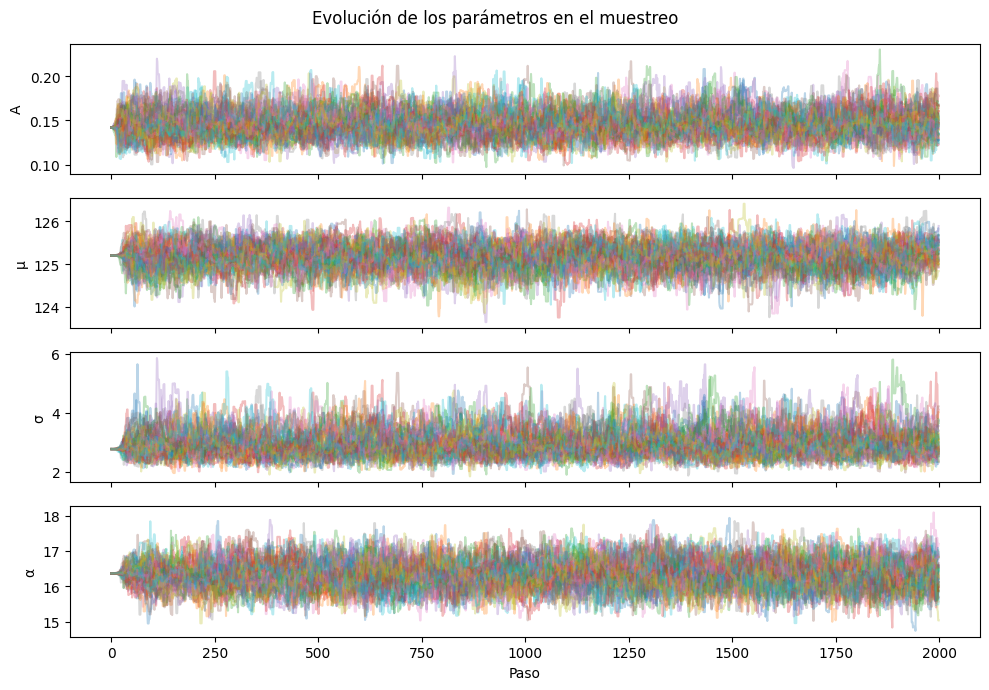

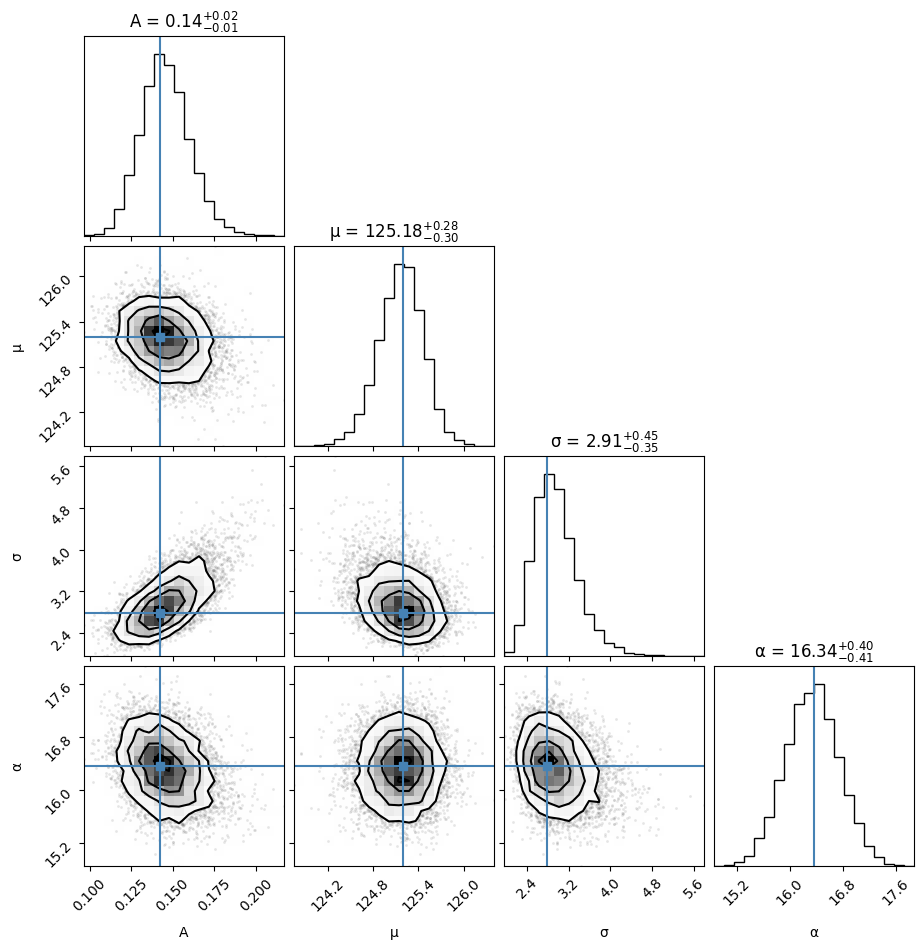

Error porcentual de la masa: 0.24%


In [108]:
#Problema 10 (Higgs boson discovery)

import emcee
import corner

data_url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data = pd.read_csv(data_url)
higgs_masses = data['Higgs']

# (b)
bin_edges = np.linspace(100, 160, 31)
hist_data, bin_edges = np.histogram(higgs_masses, bins=bin_edges)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
error_bars = np.sqrt(hist_data)
plt.errorbar(bin_centers, hist_data, yerr=error_bars, fmt='o', label="Datos", color="black")
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Distribución de masa invariante")
plt.grid(True)
plt.legend()
plt.show()

# (c)
def modelo_fondo(alpha, x):
    return (1 / alpha) * np.exp(-(x - 100) / alpha)

# (d)
def log_verosimilitud_null(alpha, x):
    L = modelo_fondo(alpha, x)
    return -np.sum(np.log(L))

# (e)
resultado_fondo = minimize(
    log_verosimilitud_null,
    x0=[10],
    args=(higgs_masses,),
    bounds=[(0, 50)]
)
alpha_fondo = resultado_fondo.x[0]
print(f"Valor estimado para el parámetro α del modelo nulo: {alpha_fondo}")

# (f)
plt.errorbar(bin_centers, hist_data, yerr=error_bars, fmt='o', label="Datos", color="black")
x_model = np.linspace(100, 160, 500)
y_fondo = modelo_fondo(alpha_fondo, x_model) * len(higgs_masses) * (bin_edges[1] - bin_edges[0])
plt.plot(x_model, y_fondo, label="Modelo nulo", color="blue")
plt.legend()
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Ajuste del modelo nulo")
plt.grid(True)
plt.show()

# (g)
def modelo_completo(params, x):
    A, mu, sigma, alpha = params
    señal = A * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    fondo = (1 - A) * (1 / alpha) * np.exp(-(x - 100) / alpha)
    return señal + fondo

# (h)
def log_verosimilitud_alt(params, x):
    L = modelo_completo(params, x)
    return -np.sum(np.log(L))

# (i)
adivinanza_inicial = [0.1, 125, 2, alpha_fondo]
limites = [(0, 1), (100, 160), (0.1, 10), (1, 50)]
resultado_completo = minimize(
    log_verosimilitud_alt,
    x0=adivinanza_inicial,
    args=(higgs_masses,),
    bounds=limites
)
A, mu, sigma, alpha_completo = resultado_completo.x
print(f"Parámetros del modelo alternativo: A={A}, μ={mu}, σ={sigma}, α={alpha_completo}")

# (j)
y_completo = modelo_completo([A, mu, sigma, alpha_completo], x_model) * len(higgs_masses) * (bin_edges[1] - bin_edges[0])
plt.errorbar(bin_centers, hist_data, yerr=error_bars, fmt='o', label="Datos", color="black")
plt.plot(x_model, y_fondo, label="Modelo nulo", color="blue")
plt.plot(x_model, y_completo, label="Modelo alternativo", color="red")
plt.legend()
plt.xlabel("Masa invariante (GeV)")
plt.ylabel("Frecuencia")
plt.title("Ajuste de la hipótesis alternativa")
plt.grid(True)
plt.show()

# (k)
logL_null = -log_verosimilitud_null(alpha_fondo, higgs_masses)
logL_alt = -log_verosimilitud_alt([A, mu, sigma, alpha_completo], higgs_masses)
n_sigma = np.sqrt(-2 * (logL_null - logL_alt))
print(f"Desviación estándar de la diferencia (nσ): {n_sigma}")

# (l)
hbar = 1.015e-23
GeV_to_J = 1.60218e-10
tau = hbar / (sigma * GeV_to_J)
print(f"Tiempo de vida estimado de la partícula: {tau} segundos")

# (m)
def log_prior(params):
    A, mu, sigma, alpha = params
    if 0. < A < 1. and 100. <= mu <= 160. and 0.1 <= sigma <= 10. and 1. <= alpha <= 50.:
        return 0.0
    return -np.inf

def log_likelihood(params, x):
    return -log_verosimilitud_alt(params, x)

def log_posterior(params, x):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x)

n_walkers = 50
n_steps = 2000
n_params = 4
inicial_pos = resultado_completo.x + 1e-4 * np.random.randn(n_walkers, n_params)
muestreador = emcee.EnsembleSampler(n_walkers, n_params, log_posterior, args=[higgs_masses])
muestreador.run_mcmc(inicial_pos, n_steps, progress=True)
muestras = muestreador.get_chain()
nombres_parametros = ["A", "μ", "σ", "α"]
fig, axes = plt.subplots(n_params, figsize=(10, 7), sharex=True)
for i in range(n_params):
    ax = axes[i]
    for walker in range(n_walkers):
        ax.plot(muestras[:, walker, i], alpha=0.3)
    ax.set_ylabel(nombres_parametros[i])
axes[-1].set_xlabel("Paso")
plt.suptitle("Evolución de los parámetros en el muestreo")
plt.tight_layout()
plt.show()

# (n)
muestras_planas = muestreador.get_chain(discard=500, thin=10, flat=True)  #
fig = corner.corner(
    muestras_planas,
    labels=nombres_parametros,
    truths=[A, mu, sigma, alpha_completo],
    show_titles=True
)
plt.show()

# (o)
mu_samples = muestras_planas[:, 1]
mu_std = np.std(mu_samples)
error_porcentual_mu = (mu_std / mu) * 100
print(f"Error porcentual de la masa: {error_porcentual_mu:.2f}%")



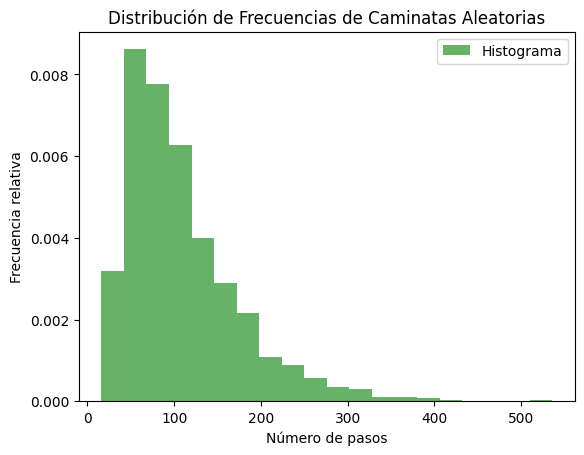

Valor esperado del número de pasos: 4.189384615384616
Valor teórico aproximado de los pasos: 100.0
Valor experimental de los pasos: 4.189384615384616
Tiempo estimado de escape: 862620168.2707882 años
Parámetros ajustados: a=12.782163346451718, c=0.6584116644655635, d=0, e=17.770126767513936


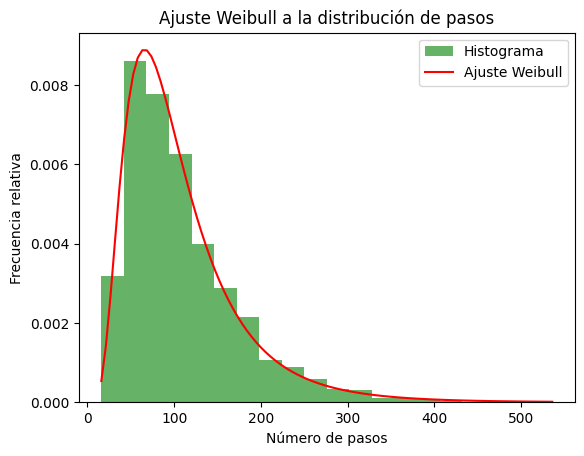

In [109]:
 # Hypothesis testing, Problema 4: Tiempo de escape de un fotón del sol
from scipy import stats

l = 0.1
Rs = 1
N = 1000

def caminata_aleatoria(l, Rs):
    x, y, z = 0, 0, 0
    pasos = 0
    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)

        pasos += 1
    return pasos

n_pasos = [caminata_aleatoria(l, Rs) for _ in range(N)]

# (b)
n_clases = 20
min_pasos, max_pasos = min(n_pasos), max(n_pasos)
bins = np.linspace(min_pasos, max_pasos, n_clases + 1)

# (c)
frecuencia, _ = np.histogram(n_pasos, bins=bins, density=True)

# (d)
plt.hist(n_pasos, bins=bins, density=True, alpha=0.6, color='g', label='Histograma')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de Frecuencias de Caminatas Aleatorias')
plt.legend()
plt.show()

# (e)
marcas_clases = (bins[:-1] + bins[1:]) / 2
valor_esperado = np.sum(frecuencia * marcas_clases)
print(f"Valor esperado del número de pasos: {valor_esperado}")

# (f)
E_teorico = (Rs / l) ** 2
print(f"Valor teórico aproximado de los pasos: {E_teorico}")
print(f"Valor experimental de los pasos: {valor_esperado}")

# (g)
c = 300000
Rs_km = 700000
l_cm = 0.6
Rs_cm = Rs_km * 1e5
tiempo_escape = (Rs_cm**2) / (l_cm * c)
tiempo_escape_anos = tiempo_escape / (60 * 60 * 24 * 365.25)
print(f"Tiempo estimado de escape: {tiempo_escape_anos} años")

# (h)
params = stats.exponweib.fit(n_pasos, floc=0)
a, c, d, e = params
print(f"Parámetros ajustados: a={a}, c={c}, d={d}, e={e}")

x_vals = np.linspace(min_pasos, max_pasos, 100)
pdf_weibull = stats.exponweib.pdf(x_vals, a, c, loc=d, scale=e)
plt.hist(n_pasos, bins=bins, density=True, alpha=0.6, color='g', label='Histograma')
plt.plot(x_vals, pdf_weibull, 'r-', label='Ajuste Weibull')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.title('Ajuste Weibull a la distribución de pasos')
plt.legend()
plt.show()

